## Exploring the data
Before training a model, we need to learn about the data we want to use. In the following, we will:

1. Conduct an explorative analysis of the data,
2. Preprocess the data,
4. Prepare the data to be used to train a model.

#### What is the goal?
First, we need to define what we actually want to do and what data we will need for that. In this case, we want to train an AI model to automatically route customer support tickets to the correct department based on a tickets contents.

## Explorative Analysis
We first take a look a the data, to determine what is of use for our goal.

In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)

filepath = "../data/dataset_en.csv"
df = pd.read_csv(filepath)
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Account Disruption,"Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\n\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?","Thank you for reaching out, <name>. We are aware of the outage affecting the centralized account management system, and our technical team is actively working to resolve the issue. In the meantime, we suggest using alternative methods to manage your account, with a focus on restoring service as quickly as possible. We will provide an update as soon as the service is back online. We apologize for the inconvenience and appreciate your patience. If you have any further questions, please let us know.",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN,NaN
1,Query About Smart Home System Integration Features,"Dear Customer Support Team,\n\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\n\nCould you kindly provide detailed compatibility information with popular smart home ecosystems such as Amazon Alexa, Google Assistant, and Apple?","Thank you for your inquiry. Our products support integration with Amazon Alexa, Google Assistant, and Apple HomeKit. Compatibility details can differ depending on the specific item; please let us know which models you are interested in. The setup process is generally user-friendly but may require professional installation. We regularly update our software to provide enhanced features. For comprehensive information on compatibility with upcoming updates, please specify the models you are considering.",Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN,NaN
2,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges.\n\nFirstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates.\n\nThank you for your assistance regarding these billing inquiries.","We appreciate you reaching out with your billing questions. The billing period generally begins on the first day of the month and concludes on the last day, with payments due by the 10th of the following month. We accept credit cards, bank transfers, and certain online payment services; credit card transactions are typically processed the quickest. Late payments may incur fees based on the due date, and any additional processing charges depend on the chosen payment method. You can review your statements for detailed payment information.",Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN,NaN
3,Question About Marketing Agency Software Compatibility,"Dear Support Team,\n\nI hope this message reaches you well. I am reaching out to ask about the compatibility of your products with the specific needs of marketing agencies. Our company is consider

### What data to keep?
Looking at the data, a few things look helpful. The 'subject' of a ticket, the 'body' that contain the contents of a customer support ticket and the 'queue' that specifies the department to which the ticket is categorized are perfect for the intended use case. To keep features low, 'subject' and body' are combined into one. Furthermore we will include 'priority', since this is an important information in real world scenarios.

The rest of the data is either 'metadata' or not relevant for our system and can be savely excluded. As such, we will only keep 'body', 'queue' and 'priority'.

In [2]:
# We fill empty values with empty strings to avoid errors
df["body"] = df["subject"].fillna("") + ". " + df["body"].fillna("")
df = df[["body","queue","priority"]]
df

,body,queue,priority
0,"Account Disruption. Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\n\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?",Technical Support,high
1,"Query About Smart Home System Integration Features. Dear Customer Support Team,\n\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\n\nCould you kindly provide detailed compatibility information with popular smart home ecosystems such as Amazon Alexa, Google Assistant, and Apple?",Returns and Exchanges,medium
2,"Inquiry Regarding Invoice Details. Dear Customer Support Team,\n\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges.\n\nFirstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates.\n\nThank you for your assistance regarding these billing inquiries.",Billing and Payments,low
3,"Question About Marketing Agency Software Compatibility. Dear Support Team,\n\nI hope this message reaches you well. I am reaching out to ask about the compatibility of your products with the specific needs of marketing agencies. Our company is considering adopting these solutions to streamline our current marketing processes and wants to confirm that the products are fully compatible with the tools and platforms we currently utilize.\n\nCould you please supply detailed information regarding the compatibility of your products with popular marketing software, CRM systems, email marketing applications, and analytics platforms? Additionally, I would appreciate any relevant case studies or documentation tailored to our use case.",Sales and Pre-Sales,medium
4,"Feature Query. Dear Customer Support,\n\nI hope this message reaches you in good health. I am eager to learn more about the features of one of your products. Would you be able to share comprehensive details about its functionalities, specifications, and any distinctive characteristics it may possess? Additionally, if there are user manuals, tutorials, or demonstration videos available, I would be grateful if you could provide those resources. Gaining a thorough understanding of the features will assist me in making an informed decision regarding the product.\n\nThank you very much for your assistance. I look forward to your prompt reply.\n\nBest regards",Technical Support,high
...,...,...,...
16333,Problem with Billing Adjustment. An unexpected billing discrepancy has been noticed in the investment analytics software following the latest system update.,Billing and Payments,high
16334,"Urgent: Incident Involving Data Breach in Medical Records Security. A data breach has occurred, which might be related to outdated procedures.",Product Support,medium
16335,Performance Problem with Data Analytics Tool. The data analytics tool experiences sluggish performance during peak times.,Technical Support,high
16336,"Update Request for SaaS Platform Integration Features. Requesting an update on the integration features fo

Taking a look at the resulting DataFrame, we can see that there are no null values, which is good.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16338 entries, 0 to 16337
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   body      16338 non-null  object
 1   queue     16338 non-null  object
 2   priority  16338 non-null  object
dtypes: object(3)
memory usage: 383.1+ KB


Taking a look at some data samples, the data seems suited for the task at hand and there is little noise. But sometimes the associated department does not seem to fit a ticket message that well. Furthermore the priority seems somewhat arbitrary at times. These findings highlight the need for a throughout evaluation later. Nontheless, the data overall looks good enough, that we will only do some basic preprocessing steps next.

In [4]:
df.head()

,body,queue,priority
0,"Account Disruption. Dear Customer Support Team,\n\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\n\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?",Technical Support,high
1,"Query About Smart Home System Integration Features. Dear Customer Support Team,\n\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\n\nCould you kindly provide detailed compatibility information with popular smart home ecosystems such as Amazon Alexa, Google Assistant, and Apple?",Returns and Exchanges,medium
2,"Inquiry Regarding Invoice Details. Dear Customer Support Team,\n\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges.\n\nFirstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates.\n\nThank you for your assistance regarding these billing inquiries.",Billing and Payments,low
3,"Question About Marketing Agency Software Compatibility. Dear Support Team,\n\nI hope this message reaches you well. I am reaching out to ask about the compatibility of your products with the specific needs of marketing agencies. Our company is considering adopting these solutions to streamline our current marketing processes and wants to confirm that the products are fully compatible with the tools and platforms we currently utilize.\n\nCould you please supply detailed information regarding the compatibility of your products with popular marketing software, CRM systems, email marketing applications, and analytics platforms? Additionally, I would appreciate any relevant case studies or documentation tailored to our use case.",Sales and Pre-Sales,medium
4,"Feature Query. Dear Customer Support,\n\nI hope this message reaches you in good health. I am eager to learn more about the features of one of your products. Would you be able to share comprehensive details about its functionalities, specifications, and any distinctive characteristics it may possess? Additionally, if there are user manuals, tutorials, or demonstration videos available, I would be grateful if you could provide those resources. Gaining a thorough understanding of the features will assist me in making an informed decision regarding the product.\n\nThank you very much for your assistance. I look forward to your prompt reply.\n\nBest regards",Technical Support,high


### Preprocessing the data
We implement a preprocessing pipeline using NLTK, including normalization, tokenization, stopword filtering, and lemmatization to reduce noise and standardize the textual input for machine learning models. Said pipeline is applied to each entry in the 'body' column and stored in a new 'clean_text' column. For the 'queue' and 'priority' columns lowercasing the entries will suffice.

In [5]:
import re
import nltk

try: 
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try: 
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try: 
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text: str) -> str:
    text = text.lower() # 1. Lowercase
    text = re.sub(r"http\S+|www\S+", "", text) # 2. Remove possible URLs
    text = re.sub(r"[^a-z\s]", "", text) # 3. Remove special characters and numbers
    tokens = word_tokenize(text) # 4. Tokenization
    tokens = [t for t in tokens if t not in stop_words and len(t) > 2] # 5. Remove stopwords
    tokens = [lemmatizer.lemmatize(t) for t in tokens] # 6. Lemmatization
    return " ".join(tokens) # 7. Concatenate back to a string

# Remove all line breaks
df.loc[:, "body"] = df["body"].str.replace("\\n\\n", " ", regex=False) 
# Apply preprocessing to all entries in 'body' column
df.loc[:,"clean_text"] = df["body"].apply(lambda x: preprocess_text(x))
# Lower every entry in 'queue' column
df.loc[:, "queue"] = df["queue"].str.lower()
# Lower every entry in 'priority' column
df.loc[:, "priority"] = df["priority"].str.lower()

df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Simon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\Simon\AppData\Local\Temp\ipykernel_9552\1739334482.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"clean_text"] = df["body"].apply(lambda x: preprocess_text(x))


,body,queue,priority,clean_text
0,"Account Disruption. Dear Customer Support Team, I am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists. Could you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?",technical support,high,account disruption dear customer support team writing report significant problem centralized account management portal currently appears offline outage blocking access account setting leading substantial inconvenience attempted log multiple time using different browser device issue persists could please provide update outage status estimated time resolution also alternative way access manage account downtime
1,"Query About Smart Home System Integration Features. Dear Customer Support Team, I hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms. Could you kindly provide detailed compatibility information with popular smart home ecosystems such as Amazon Alexa, Google Assistant, and Apple?",returns and exchanges,medium,query smart home system integration feature dear customer support team hope message reach well reaching request detailed information capability smart home integration product listed website potential customer aiming develop seamlessly interconnected home environment essential understand product interact various smart home platform could kindly provide detailed compatibility information popular smart home ecosystem amazon alexa google assistant apple
2,"Inquiry Regarding Invoice Details. Dear Customer Support Team, I hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges. Firstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates. Thank you for your assistance regarding these billing inquiries.",billing and payments,low,inquiry regarding invoice detail dear customer support team hope message find well reaching request clarification billing payment procedure linked account recently observed inconsistency charge applied would like ensure fully understand billing cycle accepted payment option potential extra charge firstly would grateful could provide detailed explanation billing cycle function specifically interested knowing start end date thank assistance regarding billing inquiry
3,"Question About Marketing Agency Software Compatibility. Dear Support Team, I hope this message reaches you well. I am reaching out to ask about the compatibility of your products with the specific needs of marketing agencies. Our company is considering adopting these solutions to streamline our current marketing processes and wants to confirm that the products are fully compatible with the tools and platforms we currently utilize. Could you please supply detailed information regarding the compatibility of your products with popular marketing software, CRM systems, email marketing applications, and analytics platforms? Additionally, I would appreciate any relevant case studies or documentation tailored to our use case.",sales and pre-sales,medium,question mark

### Taking a look at the data distribution
Next, we take a look on some stats, including the distribution of different ticket lenghts where length is the number of words, tickets per 'queue' item and distribution of 'priority'.
First, some genral statistics for the entries of the 'clean_data' column:
- Median Wordcount: 37.47
- Median Wordcount: 39.0
- Shortest Message(s): 2 words
- Longest Message(s): 104 words
- There was a single "one word" ticket, which read 'Thecompanyisincapableofaccessinginvestmentanalyticsduetosystemunavailability.'. Obviously this is a mistake and since its only one, this was fixed manually.
- Otherwise the very short and very long tickets have been checked and kept in.

#### Distribution of ticket lenghts
The median as well as histogram below show, that overall most of the messages contain between ~20 and ~60 words, meaning there are not many outliers.

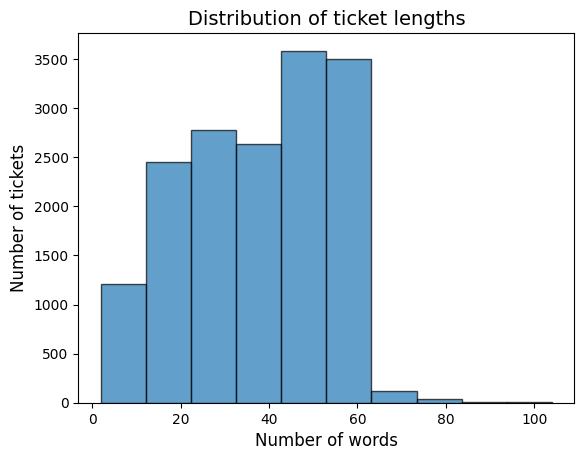

In [7]:
import matplotlib.pyplot as plt

# Calculates the lenght of each entry in the 'body' column in terms of word-count
ticket_lengths = [len(x.split()) for x in df["clean_text"]]

plt.hist(ticket_lengths, bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Number of words', fontsize=12)  
plt.ylabel('Number of tickets', fontsize=12)  
plt.title('Distribution of ticket lengths', fontsize=14)
plt.show() 

#### Distribution of tickets per department
Next we take a look at how many tickets are present per department. This will later be relevant, to avoid bias. The graphic below shows that the distribution of tickets to department is rather uneven. This means, we will need to even this out later to avoid bias in the model  train.

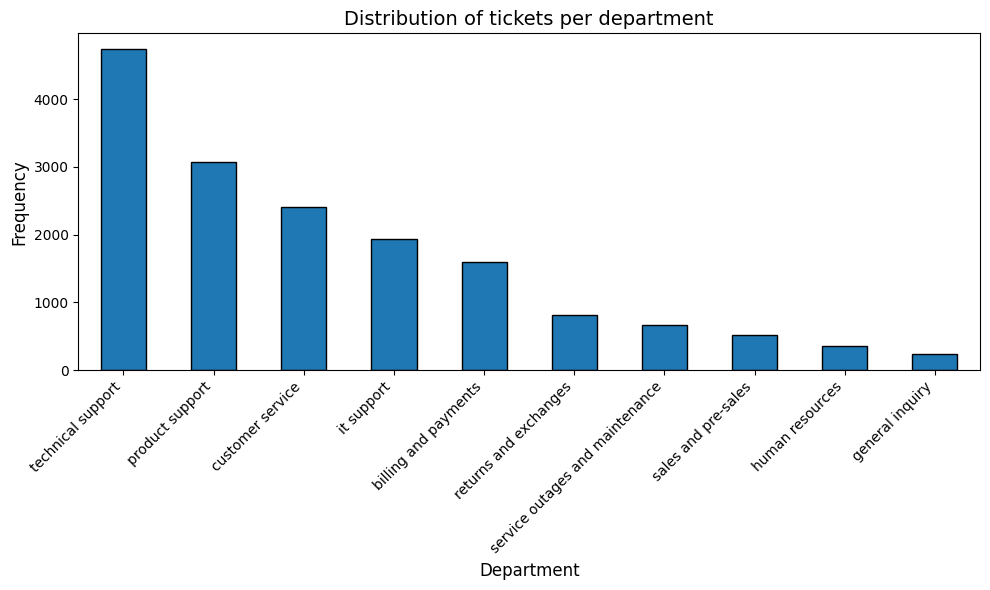

In [8]:
department_tickets = df["queue"].value_counts()

plt.figure(figsize=(10, 6))
department_tickets.plot(kind='bar', edgecolor='black')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of tickets per department', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

#### Mean word count by department
To further explore the distribution of tickets by department, we calculate the median number of words for all messages ('clean_text' contents) by department ('queue' contents). We use the median, since we have seen earlier that there are some strong outliers when it come to message lenght (overall the medians and the means are rather close anyways). 

First, we need to define some functions that help us the extract an dprocess the relvant data:

In [9]:
import statistics as st

'''
Calculates the median length of a list of strings.

Args:
    - tickets: Input list. Should be a list of strings, representing the ticket bodies.
Return:
    - float that represents the median length of the texts in the input list
'''
def calculate_median(tickets: list[str]) -> float:
    ticket_lengths = [len(x.split()) for x in tickets]  
    median = st.median(ticket_lengths)
    return median

'''
Calculates the median word count for all messages related to the different departments. 
Returns a list of tuples containing a department and the median word count of the all tickets associated with the department

Args:
    - departments: Input list. Should be a list of strings, representing the departments found in 'queue'.
Return:
    - list of tuples, containing a department and the median wordcount of the 'clean_text' contents associated with it
'''
def median_per_department(departments :list[str]) -> list[tuple]:
    medians = []
    for d in departments:
        # Get each entry in the 'clean_data' column where in the same row the content of the 'queue' column is the department d
        department_bodies = df.loc[df['queue'] == d, 'clean_text']
        # Calculate the median number of words across all messages
        median = calculate_median(department_bodies)  
        medians.append((d,median))
    return medians


When looking at the resulting graphics, we can see that the median amount of words of the messages for each department is rather balanced. As such, we will not need to take the message length as much into account when training the model later on.

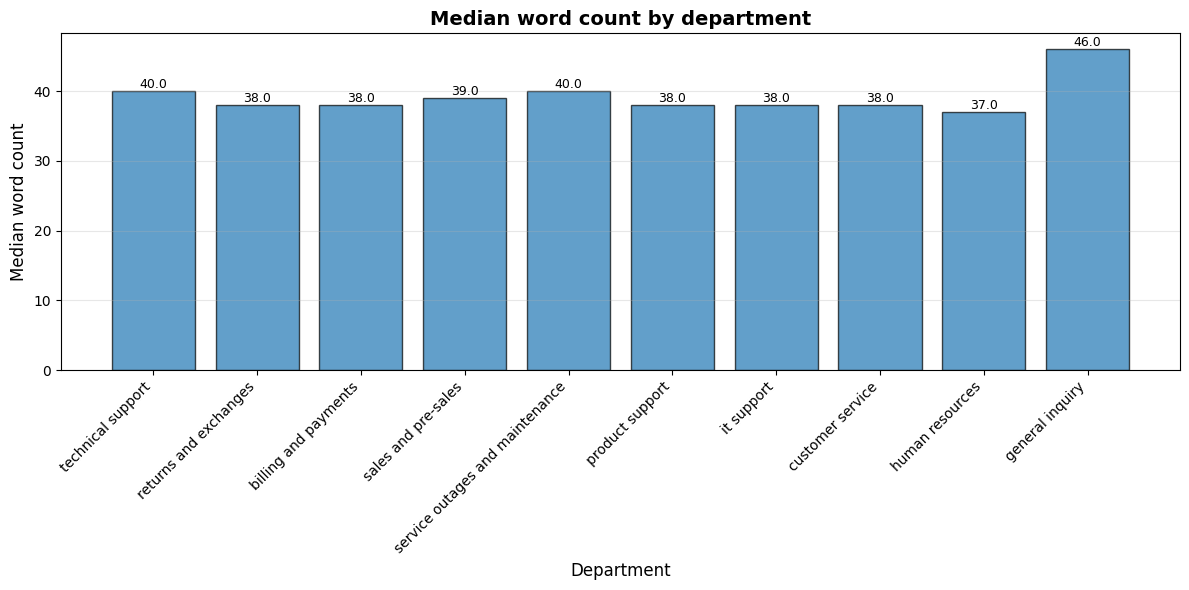

In [10]:
departments = df["queue"].unique()
data = median_per_department(departments)

queues = [item[0] for item in data]
medians = [item[1] for item in data]

plt.figure(figsize=(12, 6))
bars = plt.bar(queues, medians, edgecolor='black', alpha=0.7)

plt.xlabel('Department', fontsize=12)
plt.ylabel('Median word count', fontsize=12)
plt.title('Median word count by department', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Distribution of tickets per priority
Looking at how many tickets a present per 'priority', we notice that there are only around halve as much tickets with a 'low' priority compared to the amount of 'medium' and 'high' tickets respectively.

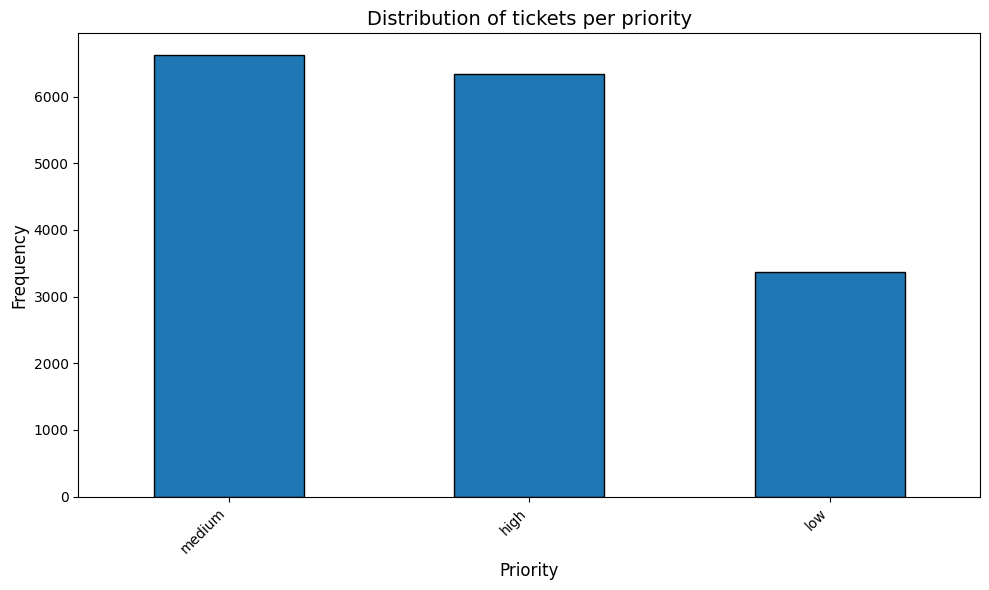

In [11]:
department_tickets = df["priority"].value_counts()

plt.figure(figsize=(10, 6))
department_tickets.plot(kind='bar', edgecolor='black')
plt.xlabel('Priority', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of tickets per priority', fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

## Summary
In this phase, the customer support ticket dataset was analyzed and prepared for machine learning.
Relevant features (ticket title, description, category, and priority) were selected and inspected.

Exploratory data analysis revealed a strong imbalance between the different ticket categories and a wide variation in ticket lengths, ranging from very short entries to detailed problem descriptions.

Ticket titles and descriptions were combined into a single text field to capture the full semantic information of each ticket. The texts were cleaned by removing formatting artifacts, special characters, and stopwords, and were normalized using lowercasing and tokenization.

After preprocessing, the dataset is clean, structured, and ready to be used for training machine learning models in the next phase of the project. As such, the output of this phase is the file `clean_data.csv`This file contains:
- `clean_text`
- `label`
- `priority`

In [15]:
df = df.drop(columns=["body"]) # Remove 'body' column since 'clean_data' will suffice

# Save to CSV
df.to_csv('../data/dataset_en_clean.csv', index=False)
print("\nSaved to '../data/dataset_en_clean.csv'")


Saved to '../data/dataset_en_clean.csv'
